**Web scraping**

In [1]:
# Installing a package that allows obtaining data from the autotrader website (1)

!pip install autotrader-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Installing a package that allows obtaining data from the web (2)
!pip install cloudscraper 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Importing relevant libraries and functions
from autotrader_scraper import get_cars, save_csv, save_json
import os
import pandas as pd

In [ ]:
pd.set_option('display.max_columns', None)

In [5]:
#List of BMW car models from the Autotrader website

#wanted_cars = ['2 Series', '2 Series Active Tourer', '2 Series Gran Tourer', '3 Series', '4 Series', '4 Series Gran Coupe', '5 Series', '7 Series', 'M3', 'M4', 'X1', 'X2', 'X3', 'X5', 'X6', 'Z4']
wanted_cars = ['2 Series', '2 Series Active Tourer', '2 Series Gran Tourer', '3 Series', '4 Series', '4 Series Gran Coupe', '5 Series', '7 Series', 'M3']

In [6]:
#Function saves the webscrapes in .csv
#Potential improvement - specify folder in which the file is saved

def return_results(model):
    """ Function to run the get_cars webscrap for the make and model inputted"""
    save_csv(results = get_cars(
             make = 'BMW',
             model = model,
             postcode = "N1 9UZ",
             radius = 1500,
             min_year = 2005,
             max_year = 2021,
             include_writeoff = "include",
             max_attempts_per_page = 5,
             verbose = False
            ))
    filename = 'BMW' + '_' + model + '.txt'
    os.rename('scraper_output.csv', filename)

In [7]:
#This took about 3 hours to run

for car in wanted_cars:
    return_results(car)

**Importing data**

In [4]:
import glob
import os
import pandas as pd
import numpy as np
import seaborn as sns  # visualisation
import matplotlib.pyplot as plt  # visualisation
from sklearn.linear_model import LinearRegression # package to build the linear regression model
from sklearn import metrics  # contains functions for module evaluation
import statsmodels.api as sm  # package to build the linear regression model
from sklearn.preprocessing import StandardScaler  # for scaling the data
from sklearn.model_selection import train_test_split # module to split data into train and test sets
from statsmodels.stats.outliers_influence import variance_inflation_factor # for determining multicoliniearity

%matplotlib inline

In [9]:
# Selecting files from the google collab directory

file_directory = r'/content/'

file_path = os.path.join(file_directory, "*.txt")

all_files = glob.glob(file_path)

In [10]:
# Checking the list of files from the local directory

all_files

['/content/BMW_5 Series.txt',
 '/content/BMW_3 Series.txt',
 '/content/BMW_2 Series.txt',
 '/content/BMW_7 Series.txt',
 '/content/BMW_4 Series Gran Coupe.txt',
 '/content/BMW_2 Series Gran Tourer.txt',
 '/content/BMW_M3.txt',
 '/content/BMW_2 Series Active Tourer.txt',
 '/content/BMW_4 Series.txt']

In [18]:
# Collecting and reading all_files

dataframes = []

for filename in all_files:

    #parameters are important to allow reading in the .txt files
    df = pd.read_csv(filename, encoding = 'utf-8', encoding_errors='ignore')

    #adding a column called filename to confirm that the correct files were exctracted
    df['filename'] = os.path.basename(filename)
    
    dataframes.append(df)

cars = pd.concat(dataframes, axis=0, ignore_index=True)

**Exploring data**

In [19]:
cars.head()

,name,link,price,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,year,filename
0,BMW 5 Series,https://www.autotrader.co.uk,"£2,760",183000.0,NaN,Manual,Diesel,3.0,Saloon,NaN,3.0L,2005 (05 reg),BMW_5 Series.txt
1,BMW 5 Series,https://www.autotrader.co.uk/dealers/bedfordsh...,"£4,480",129000.0,NaN,Automatic,Diesel,NaN,Saloon,NaN,3.0L,2005 (05 reg),BMW_5 Series.txt
2,BMW 5 Series,https://www.autotrader.co.uk/dealers/surrey/wo...,"£2,495",34000.0,NaN,Automatic,Petrol,2.0,Saloon,NaN,3.0L,2005 (05 reg),BMW_5 Series.txt
3,BMW 5 Series,https://www.autotrader.co.uk/dealers/northampt...,"£2,995",133000.0,NaN,Automatic,Diesel,3.0,Saloon,NaN,2.5L,2005 (55 reg),BMW_5 Series.txt
4,BMW 5 Series,https://www.autotrader.co.uk/dealers/leicester...,"£1,990",186000.0,NaN,Manual,Diesel,NaN,Estate,NaN,2.0L,2005 (55 reg),BMW_5 Series.txt


In [21]:
# checking for a specific car name

cars[cars['name'] == 'BMW 2 Series'].head()

,name,link,price,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,year,filename
7223,BMW 2 Series,https://www.autotrader.co.uk,"£11,000",75420.0,NaN,Automatic,Diesel,2.0,Coupe,ULEZ,2.0L,2013 (13 reg),BMW_2 Series.txt
7224,BMW 2 Series,https://www.autotrader.co.uk/dealers/kent/roch...,"£8,000",72844.0,NaN,Manual,Diesel,2.0,Coupe,ULEZ,2.0L,2014 (14 reg),BMW_2 Series.txt
7225,BMW 2 Series,https://www.autotrader.co.uk/dealers/middlesex...,"£13,689",66208.0,NaN,Automatic,Petrol,NaN,Coupe,ULEZ,2.0L,2014 (64 reg),BMW_2 Series.txt
7227,BMW 2 Series,https://www.autotrader.co.uk/dealers/hertfords...,"£13,740",73000.0,NaN,Manual,Petrol,NaN,Coupe,ULEZ,2.0L,2014 (14 reg),BMW_2 Series.txt
7228,BMW 2 Series,https://www.autotrader.co.uk,"£9,005",87000.0,NaN,Manual,Diesel,3.0,Coupe,ULEZ,2.0L,2014 (14 reg),BMW_2 Series.txt


In [22]:
# Creating another column that states the car model using the data in the 'filename' column

cars['car model'] = cars['filename'].str.replace('.txt', '', regex=False)

In [23]:
# checking this new column has been successfully made

cars[['car model']].head()

,car model
0,BMW_5 Series
1,BMW_5 Series
2,BMW_5 Series
3,BMW_5 Series
4,BMW_5 Series


In [24]:
# checking for a specific car model in the newly created 'car model' column

cars[cars['car model'] == 'BMW_5 Series'].head()

,name,link,price,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,year,filename,car model
0,BMW 5 Series,https://www.autotrader.co.uk,"£2,760",183000.0,NaN,Manual,Diesel,3.0,Saloon,NaN,3.0L,2005 (05 reg),BMW_5 Series.txt,BMW_5 Series
1,BMW 5 Series,https://www.autotrader.co.uk/dealers/bedfordsh...,"£4,480",129000.0,NaN,Automatic,Diesel,NaN,Saloon,NaN,3.0L,2005 (05 reg),BMW_5 Series.txt,BMW_5 Series
2,BMW 5 Series,https://www.autotrader.co.uk/dealers/surrey/wo...,"£2,495",34000.0,NaN,Automatic,Petrol,2.0,Saloon,NaN,3.0L,2005 (05 reg),BMW_5 Series.txt,BMW_5 Series
3,BMW 5 Series,https://www.autotrader.co.uk/dealers/northampt...,"£2,995",133000.0,NaN,Automatic,Diesel,3.0,Saloon,NaN,2.5L,2005 (55 reg),BMW_5 Series.txt,BMW_5 Series
4,BMW 5 Series,https://www.autotrader.co.uk/dealers/leicester...,"£1,990",186000.0,NaN,Manual,Diesel,NaN,Estate,NaN,2.0L,2005 (55 reg),BMW_5 Series.txt,BMW_5 Series


In [25]:
# number of columns and rows

cars.shape

(8547, 14)

**Clean and check**

In [26]:
#Duplicates

#Number of rows before dropping duplicates
duplicates = cars.shape[0]

#Dropping duplicates (if any)
cars.drop_duplicates(inplace=True)

#Checking whether any duplicates were dropped
if cars.shape[0]==duplicates:
    print("No duplicates")
else:
    print(f"The number of duplicates is {duplicates-cars.shape[0]}")

The number of duplicates is 2


In [27]:
# Dropping unnecessary columns

cars.drop(columns=['link', 'name', 'filename'], inplace=True)

In [28]:
# Checking that 'link', 'name' and 'filename' were all successfully dropped

try:
    # if the columns have cannot be dropped (because they have already been dropped), the function proceeds to the expect statement
    cars.drop(columns=['link', 'name', 'filename'], inplace=False)
except:
    print("already dropped")

already dropped


In [29]:
# looking at the summary statistics of the numerical data

cars.describe()

,mileage,BHP,owners
count,8542.000000,3529.000000,4144.000000
mean,62389.014282,198.741286,2.933398
std,38989.327336,51.399266,1.240909
min,25.000000,114.000000,2.000000
25%,30113.250000,181.000000,2.000000
50%,55998.000000,190.000000,3.000000
75%,89434.000000,192.000000,3.000000
max,225000.000000,450.000000,11.000000


In [30]:
# looking at the summary statistics of all data

cars.describe(include="all")

,price,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,year,car model
count,8545,8542.000000,3529.000000,8543,8543,4144.000000,8545,6465,8540,8341,8545
unique,2767,NaN,NaN,2,5,NaN,6,1,9,58,4
top,"£13,995",NaN,NaN,Automatic,Diesel,NaN,Saloon,ULEZ,2.0L,2018 (18 reg),BMW_3 Series
freq,54,NaN,NaN,6073,4595,NaN,4686,6465,5763,512,7146
mean,NaN,62389.014282,198.741286,NaN,NaN,2.933398,NaN,NaN,NaN,NaN,NaN
std,NaN,38989.327336,51.399266,NaN,NaN,1.240909,NaN,NaN,NaN,NaN,NaN
min,NaN,25.000000,114.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,30113.250000,181.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,55998.000000,190.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,89434.000000,192.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN


In [31]:
# Exploring the data types - note: price, engine, and the year columns should be floats, not objects

cars.dtypes

price            object
mileage         float64
BHP             float64
transmission     object
fuel             object
owners          float64
body             object
ULEZ             object
engine           object
year             object
car model        object
dtype: object

In [32]:
# Converting the price from object to float with .astype(float)
# Removing the £ from price .replace('[\£]')

cars['price'] = cars['price'].replace('[\£,]', '', regex=True).astype(float)

#Confirm changes
cars['price'].head()

0    2760.0
1    4480.0
2    2495.0
3    2995.0
4    1990.0
Name: price, dtype: float64

In [33]:
# Changing engine from object to float
# Removing L unit from engine column

cars['engine'] = cars['engine'].replace('[L\,]', '', regex=True).astype(float)

#Confirm changes
cars['engine'].head()

0    3.0
1    3.0
2    3.0
3    2.5
4    2.0
Name: engine, dtype: float64

In [34]:
# Renaming the price column into price_gbp and the engine column into engine_l (to keep knowledge of measurements)

cars.rename(columns={"price": "price_gbp", "engine": "engine_l"}, inplace=True)

#Confirm changes
cars[['price_gbp', 'engine_l']].head()

,price_gbp,engine_l
0,2760.0,3.0
1,4480.0,3.0
2,2495.0,3.0
3,2995.0,2.5
4,1990.0,2.0


In [35]:
# Determining the unique values of the car model column - decision: remove the underscore

cars["car model"].unique()

array(['BMW_5 Series', 'BMW_3 Series', 'BMW_2 Series', 'BMW_M3'],
      dtype=object)

In [36]:
# Creating a function to remove the underscore

def car_model_cleaner(x):
    return x.replace('_', ' ').strip().upper()

In [37]:
# Using the car_model_cleaner function on the car models

cars['car model'] = cars['car model'].apply(car_model_cleaner)

#Confirm changes
cars['car model'].unique()

array(['BMW 5 SERIES', 'BMW 3 SERIES', 'BMW 2 SERIES', 'BMW M3'],
      dtype=object)

In [38]:
# Reorganizing the data frame, so that the car model is the first column

first_column = cars.pop('car model')

# Insert column using insert(position, column_name, first_column) function

cars.insert(0, 'car model', first_column)

#Confirm changes
cars.head()

,car model,price_gbp,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine_l,year
0,BMW 5 SERIES,2760.0,183000.0,NaN,Manual,Diesel,3.0,Saloon,NaN,3.0,2005 (05 reg)
1,BMW 5 SERIES,4480.0,129000.0,NaN,Automatic,Diesel,NaN,Saloon,NaN,3.0,2005 (05 reg)
2,BMW 5 SERIES,2495.0,34000.0,NaN,Automatic,Petrol,2.0,Saloon,NaN,3.0,2005 (05 reg)
3,BMW 5 SERIES,2995.0,133000.0,NaN,Automatic,Diesel,3.0,Saloon,NaN,2.5,2005 (55 reg)
4,BMW 5 SERIES,1990.0,186000.0,NaN,Manual,Diesel,NaN,Estate,NaN,2.0,2005 (55 reg)


In [39]:
# Checking unique elements

print(cars['transmission'].unique()) #looks good
print(cars['fuel'].unique()) #looks good
print(cars['body'].unique()) #looks good
print(cars['ULEZ'].unique()) #looks good
print(cars['year'].unique()) #will need to seperate year and registration year

['Manual' 'Automatic' nan]
['Diesel' 'Petrol' 'Petrol Hybrid' 'Petrol Plug-in Hybrid' 'Diesel Hybrid'
 nan]
['Saloon' 'Estate' 'Coupe' 'Convertible' 'MPV' 'Hatchback']
[nan 'ULEZ']
['2005 (05 reg)' '2005 (55 reg)' '2005 (53 reg)' nan '2006 (56 reg)'
 '2006 (06 reg)' '2006 (55 reg)' '2005 (54 reg)' '2007 (57 reg)'
 '2007 (07 reg)' '2007 (56 reg)' '2007 (06 reg)' '2008 (08 reg)'
 '2008 (58 reg)' '2008 (57 reg)' '2009 (08 reg)' '2009 (59 reg)'
 '2009 (09 reg)' '2009 (58 reg)' '2009 (61 reg)' '2010 (60 reg)'
 '2010 (10 reg)' '2010 (59 reg)' '2011 (61 reg)' '2011 (11 reg)'
 '2011 (60 reg)' '2011 (22 reg)' '2012 (62 reg)' '2012 (12 reg)'
 '2012 (61 reg)' '2012 (19 reg)' '2013 (13 reg)' '2013 (63 reg)'
 '2013 (62 reg)' '2014 (64 reg)' '2014 (14 reg)' '2014 (63 reg)'
 '2015 (65 reg)' '2015 (15 reg)' '2015 (64 reg)' '2016 (16 reg)'
 '2016 (65 reg)' '2016 (66 reg)' '2017 (17 reg)' '2017 (67 reg)'
 '2017 (66 reg)' '2018 (68 reg)' '2018 (18 reg)' '2018 (67 reg)'
 '2019 (19 reg)' '2019 (68 reg)' '2

**Investigating nulls**

In [40]:
# Counting the nulls we have in our data

nulls = cars.isnull()
nulls.sum()

car model          0
price_gbp          0
mileage            3
BHP             5016
transmission       2
fuel               2
owners          4401
body               0
ULEZ            2080
engine_l           5
year             204
dtype: int64

In [41]:
# Counting the non nulls

notnull = cars.notnull()  # truth table
notnull.sum()

car model       8545
price_gbp       8545
mileage         8542
BHP             3529
transmission    8543
fuel            8543
owners          4144
body            8545
ULEZ            6465
engine_l        8540
year            8341
dtype: int64

In [42]:
#rows per column
cars.shape[0]

8545

In [43]:
# Creating a function for the number and percentage of nulls

def null_values(df):
    #number of null values
    no_nulls = df.isnull().sum()
    #total number of rows (with or without nulls)
    no_total = df.shape[0]
    nulls_df = pd.DataFrame(no_nulls, columns=['number_of_nulls'])
    nulls_df['percentage'] = round((nulls_df['number_of_nulls'] / no_total) * 100, 3)
    return nulls_df.sort_values('percentage', ascending=False)


#Checking the number and percentage of nulls
null_values(cars)

,number_of_nulls,percentage
BHP,5016,58.701
owners,4401,51.504
ULEZ,2080,24.342
year,204,2.387
engine_l,5,0.059
mileage,3,0.035
transmission,2,0.023
fuel,2,0.023
car model,0,0.000
price_gbp,0,0.000


In [44]:
# Dropping null values from columns that attribute to less than 3% of all null values


cars.dropna(
    axis=0,
    how='any',
    subset=['year', 'engine_l', "transmission", "mileage", "body",
            "fuel"],
    inplace=True
)

#Confirm changes
null_values(cars[['year', 'engine_l', "transmission", "mileage", "body",
            "fuel"]])

,number_of_nulls,percentage
year,0,0.0
engine_l,0,0.0
transmission,0,0.0
mileage,0,0.0
body,0,0.0
fuel,0,0.0


In [45]:
# Checking the new number of rows

cars.shape[0]

8332

In [46]:
# Nulls in ULEZ likely indicate lack of ULEZ - decision: fill nulls with 'NOT-ULEZ'

cars['ULEZ'].unique()

array([nan, 'ULEZ'], dtype=object)

In [47]:
# Changing ULEZ nulls to NOT-ULEZ

# changing ULEZ from object to category
cars['ULEZ'] = cars['ULEZ'].astype('category')
# setting the NOT-ULEZ category
cars['ULEZ'] = cars['ULEZ'].cat.add_categories('NOT-ULEZ')
#filling the nulls
cars['ULEZ'].fillna(
    value='NOT-ULEZ',
    method=None,
    inplace=True
)

# check nulls
print(null_values(cars[['ULEZ']]))
print('Data type is: ', cars['ULEZ'].dtypes)
print('Unique elements are: ', cars['ULEZ'].unique())

      number_of_nulls  percentage
ULEZ                0         0.0
Data type is:  category
Unique elements are:  ['NOT-ULEZ', 'ULEZ']
Categories (2, object): ['ULEZ', 'NOT-ULEZ']


In [48]:
#Filling the BHP nulls with the mean BHP value for the respective model

#empty list for appending models
fill_bhp = []

#loop for extracting unique car model names
for model in cars['car model'].unique():
    #extract the rows that refer to a unique car model
    model = cars[(cars['car model']==model)]

    #create a copy of the dataframe to get around panadas caviats
    model = model.copy()

    #filling in the BHP nulls with the mean BHP value for the respective model
    model['BHP'].fillna(value=model['BHP'].mean(), method=None, inplace=True)

    #appending the dataframe to the list
    fill_bhp.append(model)

#concating fill_bhp with cars to fill in the BHP nulls in cars
cars = pd.concat(fill_bhp, axis=0, ignore_index=True)
    
#Confirm changes
null_values(cars[['BHP']])

,number_of_nulls,percentage
BHP,0,0.0


In [49]:
# Separating the "year" part of the year column from the registration part

#Exctract the year portion from the year column (without the registration year)
year_split = cars["year"].apply(lambda x: x.split(' ')[0])

#Change the name of the old year column and drop the column
cars.rename(columns = {'year':'year_old'}, inplace = True)
cars.drop(columns='year_old', inplace=True)

#Insert the new year column (containg the year without the registration year)
cars.insert(3, "year", year_split)

#Confirm changes
cars.head()

,car model,price_gbp,mileage,year,BHP,transmission,fuel,owners,body,ULEZ,engine_l
0,BMW 5 SERIES,2760.0,183000.0,2005,187.666667,Manual,Diesel,3.0,Saloon,NOT-ULEZ,3.0
1,BMW 5 SERIES,4480.0,129000.0,2005,187.666667,Automatic,Diesel,NaN,Saloon,NOT-ULEZ,3.0
2,BMW 5 SERIES,2495.0,34000.0,2005,187.666667,Automatic,Petrol,2.0,Saloon,NOT-ULEZ,3.0
3,BMW 5 SERIES,2995.0,133000.0,2005,187.666667,Automatic,Diesel,3.0,Saloon,NOT-ULEZ,2.5
4,BMW 5 SERIES,1990.0,186000.0,2005,187.666667,Manual,Diesel,NaN,Estate,NOT-ULEZ,2.0


In [50]:
# Changing the data type of year
cars['year'] = cars['year'].astype(int)

#Confirm changes
cars['year'].dtypes

dtype('int64')

In [51]:
#Filling nulls in owners with 0 because these likely indicates no previous owners
cars['owners'].fillna(0, inplace=True)

#Confirm that all nulls have been sorted
null_values(cars)

,number_of_nulls,percentage
car model,0,0.0
price_gbp,0,0.0
mileage,0,0.0
year,0,0.0
BHP,0,0.0
transmission,0,0.0
fuel,0,0.0
owners,0,0.0
body,0,0.0
ULEZ,0,0.0


In [52]:
# Saving the data

cars.to_csv("Cleaned_cars.csv", index=False)

**Correlation**

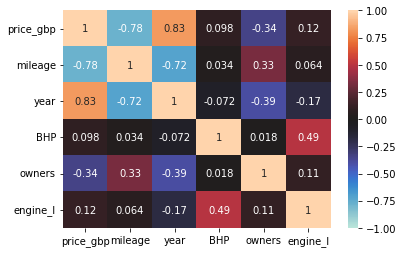

In [53]:
#Correlation - no correlation above 0.9

sns.heatmap(cars.corr(),
            annot=True,
            vmin=-1,
            vmax=1,
            robust=False,
            center=0
            )
plt.show()

**Data modelling: linear regression**

Model 1

In [54]:
# Creating a list of indepedent variables
# Independent variables are all variables besides the price_gbp

#Create a list of all cars columns
feature_train = list(cars.columns)

#Remove the depedendent variable (price_gbp)
feature_train.remove('price_gbp')

In [55]:
#Creating the X variable which features only the indepdent variables
X = cars[feature_train]

#Creating the y variable which features only the depedent variable
y = cars['price_gbp']

In [56]:
# Creating 4 portions of data which will be used for fitting and predicting values.
# The test size as '0.2' meaning 80% of data will be used to create the model and 20% will be used to 'test' the model
# y_train and y_test is the dependent variable, in this case 'price_gbp'
# Random state set to 45 to ensure reproducibility of results

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

In [57]:
# Creating a function for scaling using the StandardScaler

def scaling(scaled):
    st_scaler = StandardScaler()
    scaled = st_scaler.fit_transform(scaled)
    return scaled

In [58]:
cars.columns

Index(['car model', 'price_gbp', 'mileage', 'year', 'BHP', 'transmission',
       'fuel', 'owners', 'body', 'ULEZ', 'engine_l'],
      dtype='object')

In [59]:
# Feature engineering 1
# Scaling to normalize data for modeling and one hot encoding to allow using object/categorical variables in the model

def feature_eng(inputed):
    # Scaling the columns: 'BHP', 'mileage', 'owners' and 'engine_l'
    inputed1 = inputed[["BHP","mileage","owners","engine_l", "year"]].copy()
    inputed1['BHP'] = scaling(inputed[["BHP"]])
    inputed1['mileage'] = scaling(inputed[["mileage"]])
    inputed1["owners"] = scaling(inputed[["owners"]])
    inputed1['engine_l'] = scaling(inputed[["engine_l"]])
    inputed1["year"] = scaling(inputed[["year"]])

    # One hot encoding: 'year_old', 'car_model', 'transmission', 'fuel', 'body', 'ULEZ'
    inputed2= pd.get_dummies(inputed[["car model","transmission","fuel","body","ULEZ"]], columns = ["car model","transmission","fuel","body","ULEZ"], prefix = ["car model","transmission","fuel","body","ULEZ"], drop_first=True)
     
    #Join the scaled and one hot encoded data
    inputed1 = inputed2.join(inputed1)

    #add a constant
    inputed1 = sm.add_constant(inputed1)

    return inputed1

In [60]:
# Feature engineering the train data

X_train = feature_eng(X_train)

#Fitting linear regression on the train data
lin_reg = sm.OLS(y_train, X_train)
results = lin_reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_gbp   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     3180.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:35:54   Log-Likelihood:                -63256.
No. Observations:                6665   AIC:                         1.265e+05
Df Residuals:                    6646   BIC:                         1.267e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [61]:
# Creating a dependent variable prediction based on model
X_train['y_pred'] = results.predict(X_train)

#extracting the RMSE for the train data
rmse = sm.tools.eval_measures.rmse(y_train, X_train['y_pred'])
print(rmse)

3202.874359145644


In [62]:
# Feature engineering on the test data

X_test = X_test[feature_train]
X_test = feature_eng(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [63]:
#Test data: predicting the dependent variable and calculating the rmse

X_test['y_pred'] = results.predict(X_test)
rmse = sm.tools.eval_measures.rmse(y_test, X_test['y_pred'])
print(rmse)

3235.0589553889426


Model 2

In [71]:
#Create a list of all cars columns
feature_train = list(cars.columns)

#Remove the depedendent variable (price_gbp)
feature_train.remove('price_gbp')

In [72]:
#Creating the X variable which features only the indepdent variables
X = cars[feature_train]

#Creating the y variable which features only the depedent variable
y = cars['price_gbp']

In [73]:
# Creating 4 portions of data which will be used for fitting and predicting values.
# The test size as '0.2' meaning 80% of data will be used to create the model and 20% will be used to 'test' the model
# y_train and y_test is the dependent variable, in this case 'price_gbp'
# We used the random state 45 across all our models to ensure validity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

In [74]:
#Feature engineering (2)
#Estimated that transmission, body, and ULEZ are not that relevant

def feature_eng(inputed):
  # Scaling the columns: 'BHP', 'mileage', 'owners' and 'engine_l'
  inputed1 = inputed[["BHP","mileage","owners","engine_l", "year"]].copy()
  inputed1['BHP'] = scaling(inputed[["BHP"]])
  inputed1['mileage'] = scaling(inputed[["mileage"]])
  inputed1['engine_l'] = scaling(inputed[["engine_l"]])
  inputed1["year"] = scaling(inputed[["year"]])
  
  # One hot encoding: 'year_old', 'car_model', 'transmission', 'fuel', 'body', 'ULEZ'
  inputed2= pd.get_dummies(inputed[["car model", "fuel"]], columns = ["car model", "fuel"], prefix = ["car model", "fuel"], drop_first=True)
  
  #Join the scaled and one hot encoded data
  inputed1 = inputed2.join(inputed1)
  
  #add a constant
  inputed1 = sm.add_constant(inputed1)
  
  return inputed1

In [75]:
# Feature engineering the train data

X_train = feature_eng(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [76]:
#Fitting a linear regression on the train data

lin_reg = sm.OLS(y_train, X_train)
results = lin_reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_gbp   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     4422.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:37:01   Log-Likelihood:                -63483.
No. Observations:                6665   AIC:                         1.270e+05
Df Residuals:                    6652   BIC:                         1.271e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [77]:
# Creating a dependent variable prediction based on model
X_train['y_pred'] = results.predict(X_train)

#extracting the RMSE for the train data
rmse = sm.tools.eval_measures.rmse(y_train, X_train['y_pred'])
print(rmse)

3314.052146905398


In [78]:
# Feature engineering on the test data

X_test = X_test[feature_train]
X_test = feature_eng(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [79]:
#Test data: predicting the dependent variable and calculating the rmse

X_test['y_pred'] = results.predict(X_test)
rmse = sm.tools.eval_measures.rmse(y_test, X_test['y_pred'])
print(rmse)

3323.336454351751


**Investigating multicolinearity** in Model 2

In [80]:
X_train.columns

Index(['const', 'car model_BMW 3 SERIES', 'car model_BMW 5 SERIES',
       'car model_BMW M3', 'fuel_Diesel Hybrid', 'fuel_Petrol',
       'fuel_Petrol Hybrid', 'fuel_Petrol Plug-in Hybrid', 'BHP', 'mileage',
       'owners', 'engine_l', 'year', 'y_pred'],
      dtype='object')

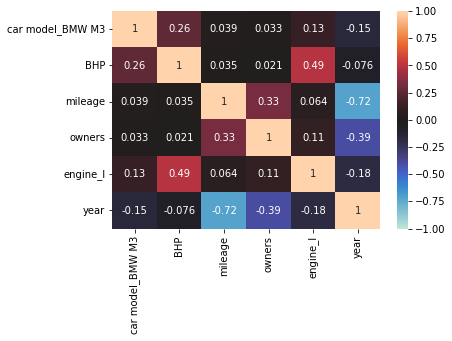

In [86]:
#Correlation - no strong multicoliniearity between the selected features

sns.heatmap(X_train[['car model_BMW M3', 'BHP', 'mileage',
       'owners', 'engine_l', 'year']].corr(),
            annot=True,
            vmin=-1,
            vmax=1,
            robust=False,
            center=0
            )
plt.show()

# mileage and year inveresely correlate - likely because newer cars had less opportunity to be driven as opposed to older cars

In [88]:
# Investigating the variance Inflation Factor (VIF).

# creating an empty dataframe
vif_df = pd.DataFrame()

# choosing VIF features
vif_df["feature"] = X_train[['car model_BMW M3', 'BHP', 'mileage',
       'owners', 'engine_l', 'year']].columns 

In [90]:
# calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X_train[['car model_BMW M3', 'BHP', 'mileage',
       'owners', 'engine_l', 'year']].values, i) 
                          for i in range(len(X_train[['car model_BMW M3', 'BHP', 'mileage',
       'owners', 'engine_l', 'year']].columns))]

In [91]:
#Checking the VIF scores 
vif_df

#all scores are below 5, indicating that there should not be multicoliniarity between the selected features

,feature,VIF
0,car model_BMW M3,1.107750
1,BHP,1.404991
2,mileage,2.103981
3,owners,1.107706
4,engine_l,1.374143
5,year,2.249342


**Next:** improve models to minimize the RMSE; create a function that predicts car prices.